In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GaussianNoise, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Calculating steps
train_steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
test_steps = math.ceil(test_generator.samples / test_generator.batch_size)

print(f'Train steps per epoch: {train_steps_per_epoch}')
print(f'Test steps: {test_steps}')

Train steps per epoch: 648
Test steps: 171


In [ ]:
import math

# Calculate the number of steps per epoch
train_steps_per_epoch = math.ceil(train_generator.samples / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.samples / validation_generator.batch_size)


In [ ]:
# Print file paths in train_generator
for file_path in train_generator.filepaths:
    print(file_path)

# Print file paths in test_generator
for file_path in test_generator.filepaths:
    print(file_path)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4572.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4573.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4574.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4578.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4579.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4586.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_459.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4593.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4596.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4600.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4603.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4611.jpeg
/content/drive/MyDrive/Train_Test_Split/train_val/Normal/aug_0_4613.jpeg
/

In [ ]:
#new code

In [ ]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
train_set1 = '/content/drive/MyDrive/Train_Test_Split (1)/train_val'
test_set1 = '/content/drive/MyDrive/Train_Test_Split (1)/test'

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_set1,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(
    test_set1,
    target_size = (224,224),
    batch_size = 8,
    class_mode = 'binary')

Found 5178 images belonging to 2 classes.
Found 1365 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Normal': 0, 'OSCC': 1}

In [ ]:
base_for_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)

In [ ]:
for layer in base_for_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_for_model)
model.add(GaussianNoise(0.25)) #to prevent overfitting
model.add(GlobalAveragePooling2D()) #to converge and reduce the parameters
model.add(Dense(512, activation = 'relu')) #hidden layer (relu activation function is suggested for images)
model.add(BatchNormalization()) #to prevent overfitting
model.add(Dense(1, activation='sigmoid')) #output layer

In [ ]:
adam= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss= 'binary_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
mp= tf.keras.callbacks.ModelCheckpoint(filepath='mymodel.keras',
                               verbose=2, save_best_only=True)
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=3)
callback=[es,mp]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=80, #steps_per_epoch= training_images/batch_size= 4946/8<=618
    epochs = 6, #own choice
    validation_data = test_generator,
    validation_steps = 20,
    callbacks=callback
)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - AUC: 0.5997 - Precision: 0.5490 - Recall: 0.5890 - accuracy: 0.5616 - loss: 0.8456
Epoch 1: val_loss improved from inf to 0.96177, saving model to mymodel.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 67s 370ms/step - AUC: 0.6008 - Precision: 0.5497 - Recall: 0.5896 - accuracy: 0.5625 - loss: 0.8441 - val_AUC: 0.7250 - val_Precision: 0.5673 - val_Recall: 0.8082 - val_accuracy: 0.6313 - val_loss: 0.9618
Epoch 2/6
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - AUC: 0.7753 - Precision: 0.6883 - Recall: 0.6841 - accuracy: 0.7086 - loss: 0.5961
Epoch 2: val_loss improved from 0.96177 to 0.62038, saving model to mymodel.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 28s 351ms/step - AUC: 0.7752 - Precision: 0.6884 - Recall: 0.6837 - accuracy: 0.7085 - loss: 0.5963 - val_AUC: 0.8101 - val_Precision: 0.8103 - val_Recall: 0.5802 - val_accuracy: 0.7188 - val_loss: 0.6204
Epoch 3/6
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - AUC: 0.8237 - Precision: 0.7509 - Recall: 0.7334 - accuracy: 

In [ ]:
print(history.history.keys())
import matplotlib.pyplot as plt
acc=(history.history['accuracy'])
loss=(history.history['loss'])
prc=(history.history['Precision'])
rec=(history.history['Recall'])
auc=(history.history['AUC'])
val_acc=(history.history['val_accuracy'])
val_loss=(history.history['val_loss'])
val_prc=(history.history['val_Precision'])
val_rec=(history.history['val_Recall'])
val_auc=(history.history['val_AUC'])

dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


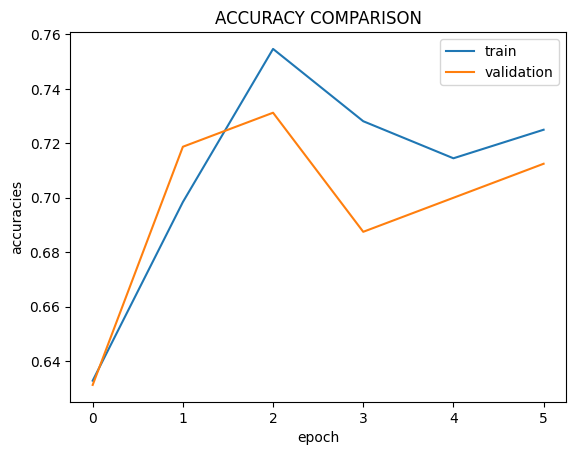

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('ACCURACY COMPARISON')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('ACCURACY COMPARISON')
plt.legend(['train','validation'])

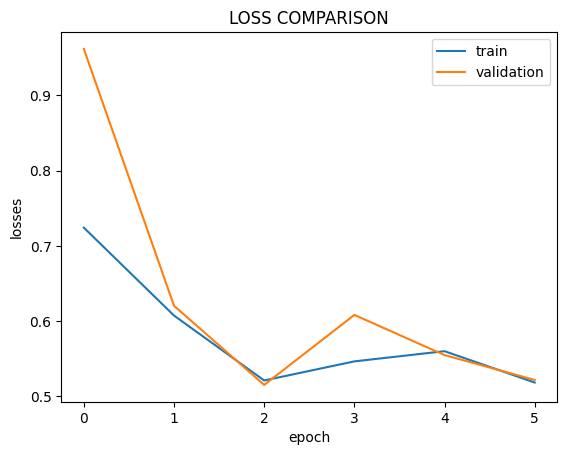

In [ ]:
plt.title('LOSS COMPARISON')
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['train','validation'])

In [ ]:
model.evaluate(train_generator)

648/648 ━━━━━━━━━━━━━━━━━━━━ 176s 271ms/step - AUC: 0.8428 - Precision: 0.7310 - Recall: 0.7820 - accuracy: 0.7568 - loss: 0.4951


[0.4881257116794586,
 0.764194667339325,
 0.7367647290229797,
 0.7987245917320251,
 0.8490635752677917]

In [ ]:
model.evaluate(test_generator)

171/171 ━━━━━━━━━━━━━━━━━━━━ 58s 336ms/step - AUC: 0.8469 - Precision: 0.7490 - Recall: 0.7899 - accuracy: 0.7674 - loss: 0.4852


[0.500312864780426,
 0.764102578163147,
 0.7400000095367432,
 0.7872340679168701,
 0.8393582701683044]

171/171 ━━━━━━━━━━━━━━━━━━━━ 48s 275ms/step


<Axes: >

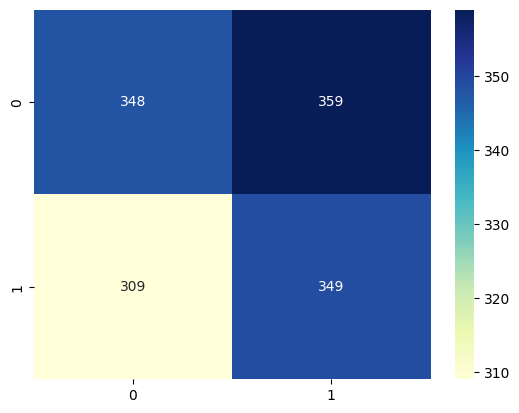

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_generator)
test_generator.classes
cm = confusion_matrix(test_generator.classes, predictions.round())

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predictions.round())) #.argmax(axis=-1)

              precision    recall  f1-score   support

           0       0.53      0.49      0.51       707
           1       0.49      0.53      0.51       658

    accuracy                           0.51      1365
   macro avg       0.51      0.51      0.51      1365
weighted avg       0.51      0.51      0.51      1365



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


'Squamous Cell Carcinoma'

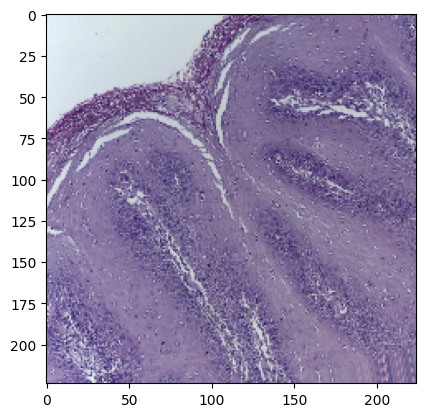

In [ ]:
import keras.preprocessing.image as kp_image # Import the image module with an alias
#normal:0 , cancerous:1
img = kp_image.load_img('/content/drive/MyDrive/Train_Test_Split (1)/train_val/OSCC/aug_0_1000.jpeg',target_size=(224,224))
imaga = kp_image.img_to_array(img)
image_array = np.expand_dims(imaga,axis=0)  # Rename this variable to avoid overwriting the module
ypred = model.predict(image_array)
if ypred<0.5:
    ypred="Normal"
else:
    ypred="Squamous Cell Carcinoma"
plt.imshow(img)
ypred